<a href="https://colab.research.google.com/github/sickk-sake/fire-detection/blob/main/notebook097f81b537.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
elmadafri_the_wildfire_dataset_path = kagglehub.dataset_download('elmadafri/the-wildfire-dataset')

print('Data source import complete.')


100%|██████████| 9.94G/9.94G [01:39<00:00, 108MB/s]

Extracting files...


Data source import complete.


In [9]:
import kagglehub

# Download the latest version of the wildfire dataset
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("✅ Dataset downloaded at:", path)


✅ Dataset downloaded at: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


In [ ]:
# TO ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

In [7]:
# Load and explore the dataset
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [10]:
# Set dataset directories
train_dir = os.path.join(path, "the_wildfire_dataset_2n_version/train")
val_dir = os.path.join(path, "the_wildfire_dataset_2n_version/val")
test_dir = os.path.join(path, "the_wildfire_dataset_2n_version/test")


In [11]:
classes = sorted(os.listdir(train_dir))
num_classes = len(classes)

print(f'🔥 Number of Classes: {num_classes}')
print(f'📂 Classes: {classes}')


🔥 Number of Classes: 2
📂 Classes: ['fire', 'nofire']


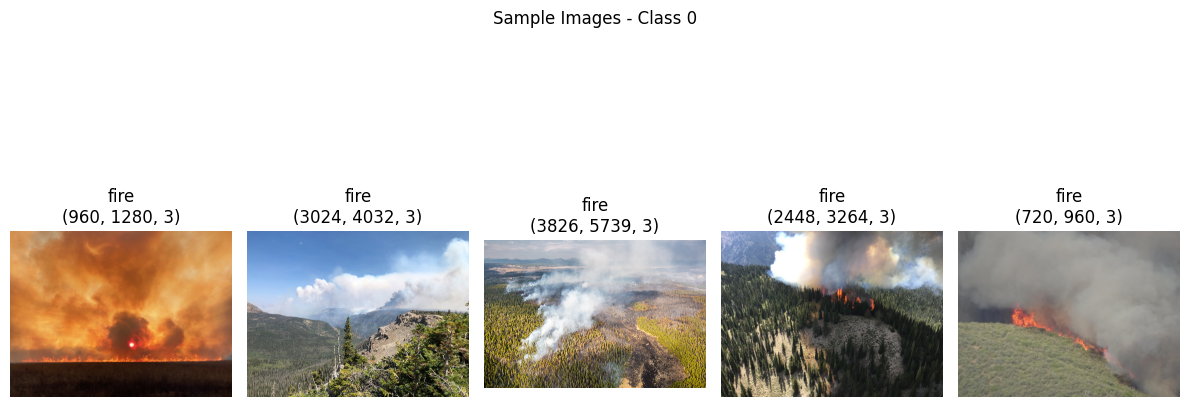

In [12]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 6))
class0_path = os.path.join(train_dir, classes[0])

for i, img_name in enumerate(os.listdir(class0_path)[:5]):
    img_path = os.path.join(class0_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f'{classes[0]}\n{img.shape}')
    plt.axis('off')
plt.suptitle("Sample Images - Class 0")
plt.tight_layout()
plt.show()


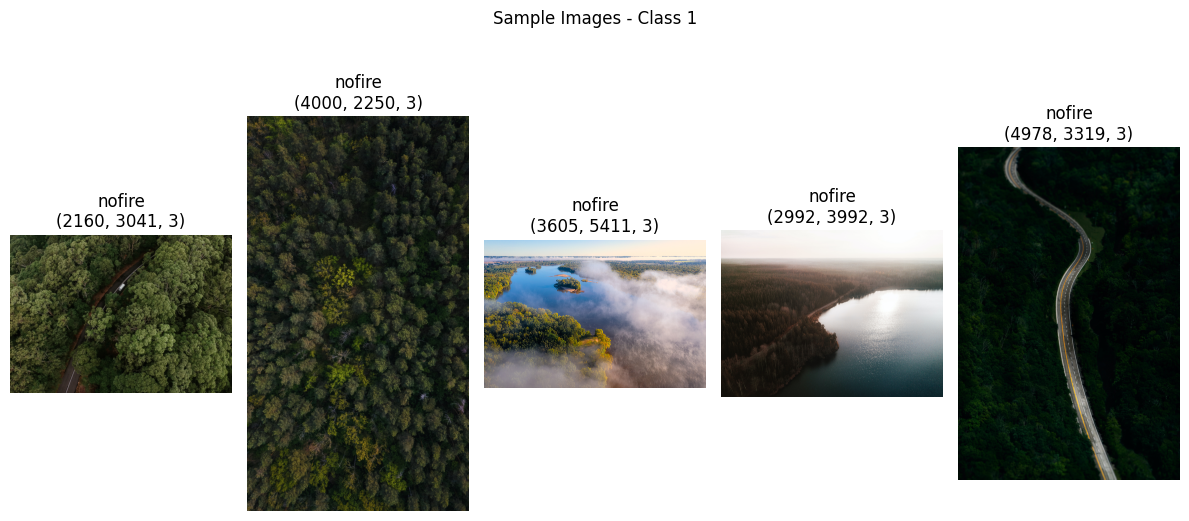

In [13]:
# Let's visualize2 the images in the dataset
plt.figure(figsize=(12, 6))
class1_path = os.path.join(train_dir, classes[1])

for i, img_name in enumerate(os.listdir(class1_path)[:5]):
    img_path = os.path.join(class1_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f'{classes[1]}\n{img.shape}')
    plt.axis('off')
plt.suptitle("Sample Images - Class 1")
plt.tight_layout()
plt.show()
